In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import acquire

Using your store items data:



In [2]:
df = acquire.get_store_item_demand_data()
df.head(5)

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


Convert date column to datetime format.

In [3]:
df.sale_date = df.sale_date.apply(lambda date: date[:-13])
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')

Plot the distribution of sale_amount and item_price.

<AxesSubplot:>

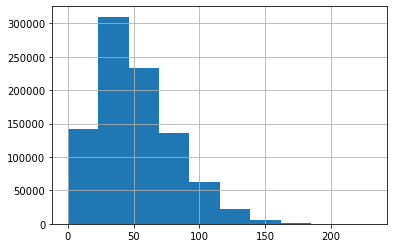

In [4]:
df.sale_amount.hist()

<AxesSubplot:>

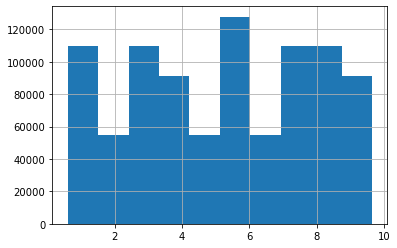

In [5]:
df.item_price.hist()

Set the index to be the datetime variable.

In [6]:
df = df.set_index('sale_date').sort_index()

In [7]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


In [8]:
df = df.rename(columns={'sale_amount': 'quantity'})

Add a 'month' and 'day of week' column to your dataframe.

In [11]:
# Month
df['month'] = df.index.strftime('%m-%b')
# Day
df['day_of_week'] = df.index.strftime('%w-%a')

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [12]:
df['sales_total'] = df.quantity * df.item_price

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [13]:
def prep_store_data(df):
    df.sale_date = df.sale_date.apply(lambda date: date[:-13])
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    # make sure we sort by date/time before resampling or doing other time series manipulations
    df = df.set_index('sale_date').sort_index()
    df = df.rename(columns={'sale_amount': 'quantity'})
    df['month'] = df.index.strftime('%m-%b')
    df['day_of_week'] = df.index.strftime('%w-%a')
    df['sales_total'] = df.quantity * df.item_price
    return df

<b>OPS DATA </b>

Convert date column to datetime format.

In [15]:
opsdf = acquire.get_opsd_data()
opsdf

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [16]:
# Readability / help
opsd.columns = [column.replace('+','_').lower() for column in opsd]

Convert date column to datetime format.

In [17]:
opsd.date = pd.to_datetime(opsd.date)

Plot the distribution of each of your variables.

<AxesSubplot:>

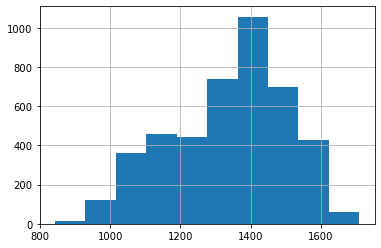

In [18]:
opsd.consumption.hist()

<AxesSubplot:>

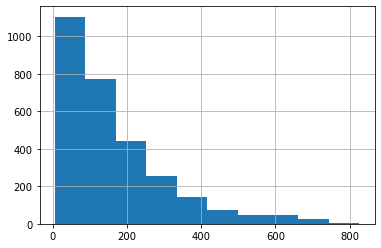

In [19]:
opsd.wind.hist()

<AxesSubplot:>

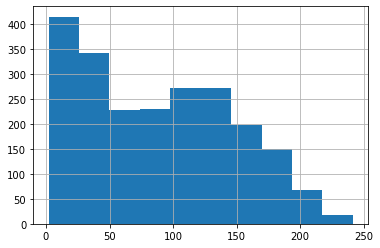

In [20]:
opsd.solar.hist()

<AxesSubplot:>

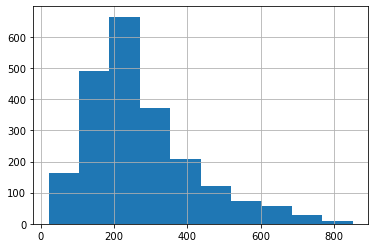

In [22]:
opsd.wind_solar.hist()

Set the index to be the datetime variable.

In [23]:
opsd = opsd.set_index('date').sort_index()

Add a month and a year column to your dataframe.

In [24]:
opsd['month'] = opsd.index.strftime('%m-%b')
opsd['year'] = opsd.index.year

Fill any missing values.

In [25]:
opsd = opsd.fillna(0)
opsd['wind_solar'] = opsd.wind + opsd.solar

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [26]:
def prep_opsd_data(df):
    df.columns = [column.replace('+','_').lower() for column in df]
    df.date = pd.to_datetime(df.date)
    df = df.set_index('date').sort_index()
    df['month'] = df.index.strftime('%m-%b')
    df['year'] = df.index.year
    df = df.fillna(0)
    df['wind_solar'] = df.wind + df.solar
    return df